### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [21]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = tf.keras.datasets.cifar10.load_data()

In [14]:
(train_images, train_labels), (test_images, test_labels) = data

In [15]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [16]:
train_images_1 = tf.image.rgb_to_grayscale(
    train_images
)

In [17]:
test_images_1 = tf.image.rgb_to_grayscale(
    test_images
)

In [26]:
print(train_images_1.shape)
print(test_images_1.shape)
print(train_labels.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)
(50000, 1)


In [27]:
model1 = models.Sequential()
model1.add(layers.Conv2D(filters=8,
                        kernel_size=(3, 3),
                        input_shape=(32, 32, 1),
                        padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.25))
model1.add(layers.Flatten())
model1.add(layers.Dense(32, activation="relu"))
model1.add(layers.Dense(10, activation="softmax"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 65,978
Trainable params: 65,978
Non-trainable params: 0
__________________________________________________

In [28]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model1.fit(train_images_1, train_labels, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 13ms/step - loss: 4.8399 - accuracy: 0.0978
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3030 - accuracy: 0.0974
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3027 - accuracy: 0.0968
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3027 - accuracy: 0.0987
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3028 - accuracy: 0.0968


In [44]:
test_loss, test_acc = model1.evaluate(test_images_1,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc, "\nLoss:", test_loss)

313/313 - 2s - loss: 2.3026 - accuracy: 0.1000

Test accuracy: 0.10000000149011612 
Loss: 2.3026437759399414


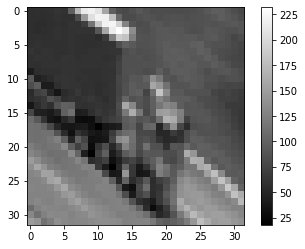

In [37]:
plt.figure()
plt.imshow(train_images_1[50], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

### 2.

**BONUS: Entrena la red neuronal 1 pero esta vez con las imágenes a color.**

In [46]:
model2 = models.Sequential()
model2.add(layers.Conv2D(filters=8,
                        kernel_size=(3, 3),
                        input_shape=(32, 32, 3),
                        padding='same'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(16, activation="sigmoid"))
model2.add(layers.Dense(32, activation="sigmoid"))
model2.add(layers.Dense(10, activation="softmax"))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [47]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model2.fit(train_images, train_labels, epochs= 2)

Epoch 1/2
1216/1563 [======================>.......] - ETA: 5s - loss: 2.3212 - accuracy: 0.1012

KeyboardInterrupt: 

In [45]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc, "\nLoss:", test_loss)

313/313 - 3s - loss: 2.3026 - accuracy: 0.1000

Test accuracy: 0.10000000149011612 
Loss: 2.3026046752929688
